In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
x = df.iloc[:,3:]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


<Axes: title={'center': 'Unclustered Data'}, xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

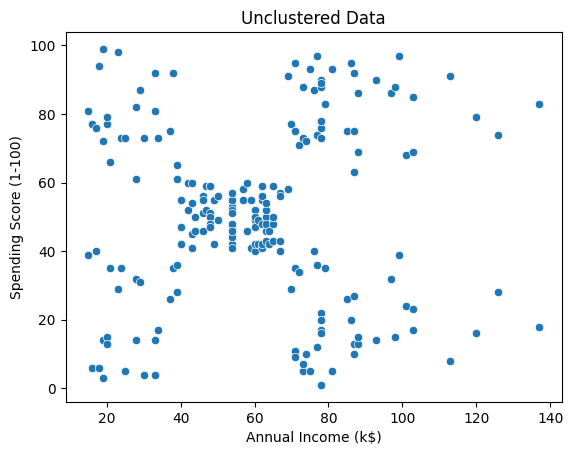

In [5]:
plt.title('Unclustered Data')
sns.scatterplot(x=x['Annual Income (k$)'],y=x['Spending Score (1-100)'])

In [6]:
from sklearn.cluster import KMeans, AgglomerativeClustering

Agglomerative Clustering is a type of hierarchical Clustering

In [7]:
km = KMeans(n_clusters=4)

In [8]:
km.fit_predict(x)

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [10]:
#sse
km.inertia_

73679.78903948836

In [9]:
sse =[]
for k in range(1,16):
    km = KMeans(n_clusters=k)
    km.fit_predict(x)
    sse.append(km.inertia_)

In [10]:
sse

[269981.28,
 184609.98434090617,
 106348.37306211118,
 82472.19413919415,
 44448.45544793371,
 37455.984555160285,
 34659.08134980962,
 25388.76002817937,
 23429.603282147626,
 21823.999007936512,
 18212.292811990876,
 16099.925688363925,
 15244.05585982159,
 13422.5633645766,
 13647.934318555008]

Elbow Method

Text(0, 0.5, 'SSE')

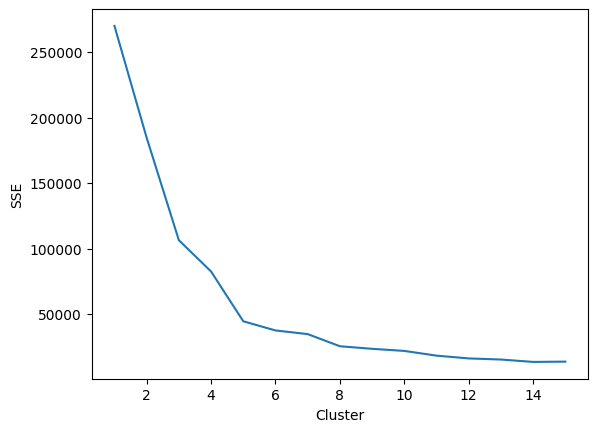

In [12]:
sns.lineplot(x=range(1, 16), y=sse)
plt.xlabel('Cluster')
plt.ylabel('SSE')

So at 5th cluster 

In [13]:
#Method second or alternative for elbow method
from sklearn.metrics import silhouette_score

In [14]:
silh =[]
for k in range(2,16):
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(x)
    score = silhouette_score(x, labels)
    silh.append(score)

In [15]:
silh

[np.float64(0.390967421739209),
 np.float64(0.46761358158775435),
 np.float64(0.4931963109249047),
 np.float64(0.553931997444648),
 np.float64(0.5130050511575778),
 np.float64(0.44549330823749317),
 np.float64(0.4556105162170843),
 np.float64(0.44968817467374805),
 np.float64(0.44516343136590647),
 np.float64(0.45512735902690804),
 np.float64(0.4071327363319401),
 np.float64(0.4274905347834417),
 np.float64(0.39448013242114427),
 np.float64(0.431321688826414)]

Text(0, 0.5, 'silh')

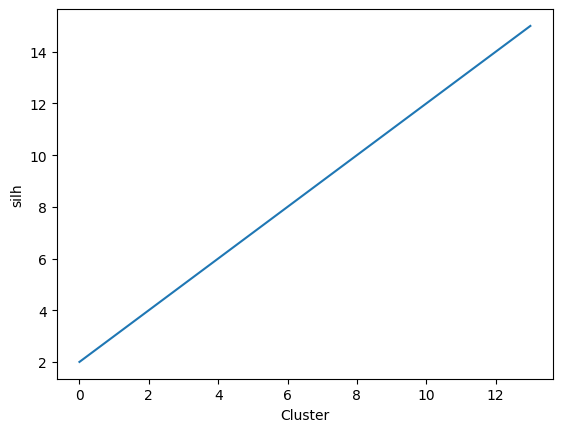

In [16]:
sns.lineplot(range(2,16))
plt.xlabel('Cluster')
plt.ylabel('silh')

<BarContainer object of 14 artists>

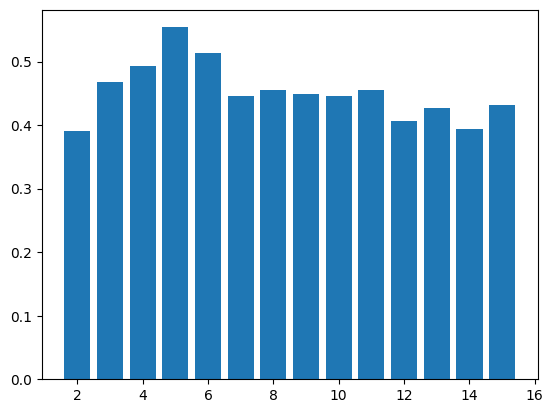

In [16]:
plt.bar(range(2,16,1),silh)

In [17]:
km = KMeans(n_clusters=5,random_state=1)

In [18]:
labels = km.fit_predict(x)

In [19]:
km.labels_

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [20]:
cent = km.cluster_centers_

<Axes: title={'center': 'Clustered Data'}, xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

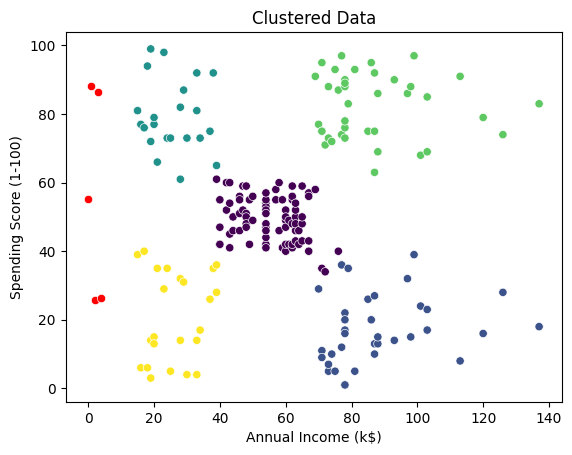

In [21]:
plt.title('Clustered Data')
sns.scatterplot(x=x['Annual Income (k$)'],y=x['Spending Score (1-100)'],c=labels )
sns.scatterplot(cent[:,0], color='red')

In [22]:
df[labels==0]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
43,44,Female,31,39,61
46,47,Female,50,40,55
47,48,Female,27,40,47
48,49,Female,29,40,42
49,50,Female,31,40,42
...,...,...,...,...,...
121,122,Female,38,67,40
122,123,Female,40,69,58
126,127,Male,43,71,35
132,133,Female,25,72,34


In [23]:
agl = AgglomerativeClustering(n_clusters=5)

In [24]:
alabels = agl.fit_predict(x)

In [25]:
alabels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

<Axes: title={'center': 'KMEANS'}, xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

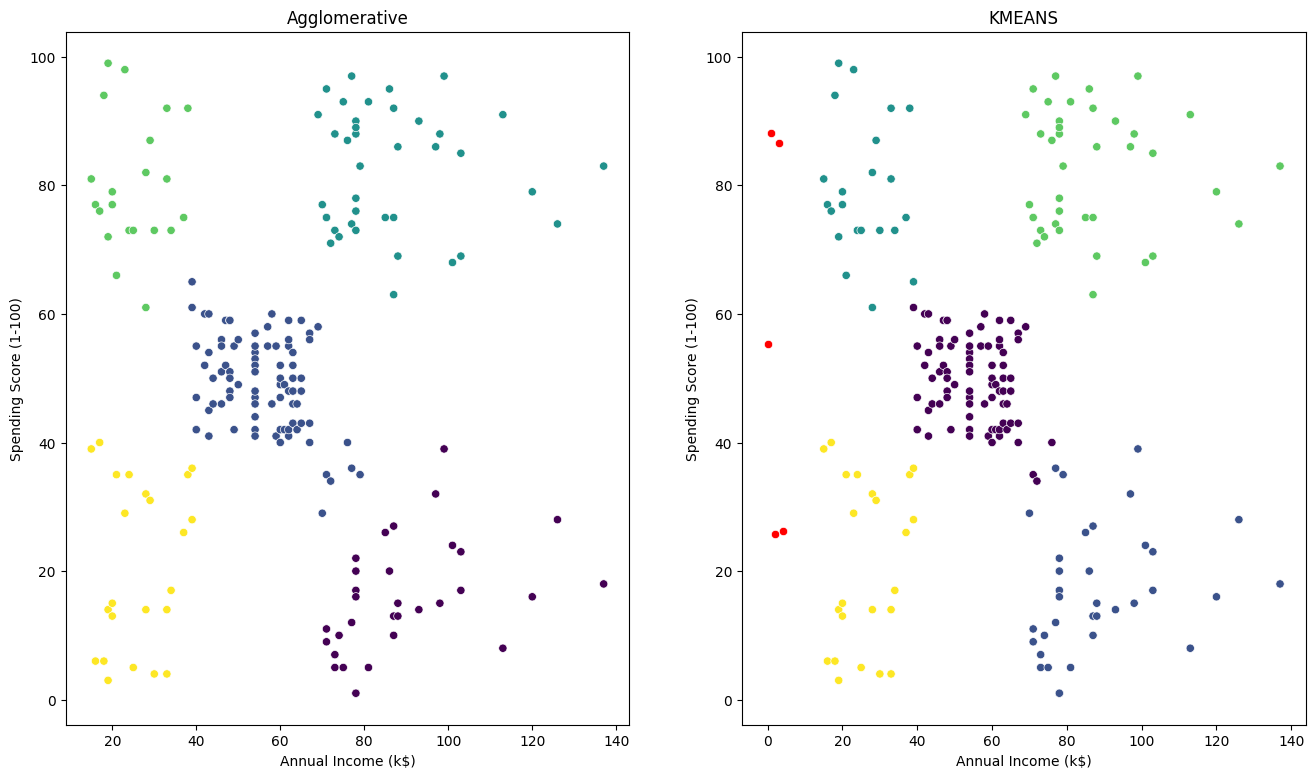

In [26]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('Agglomerative')
sns.scatterplot(x=x['Annual Income (k$)'],y=x['Spending Score (1-100)'], c= alabels)

plt.subplot(1,2,2)
plt.title('KMEANS')
sns.scatterplot(x=x['Annual Income (k$)'],y=x['Spending Score (1-100)'],c=labels )
sns.scatterplot(cent[:,0], color='red')